# Baseline Model
---

This is the baseline model with no AR_Net backend or Additive Events to account for in them odel. We will msot ly be hyperparameter tuning the learning rates of our companies.

## Package Installaion

In [63]:
%pip install statsmodels


[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [64]:
%pip install neuralprophet
%pip install matplotlib
%pip install seaborn
%pip install pickle


[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle

[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Package Importation

In [65]:
from neuralprophet import NeuralProphet, set_random_seed, set_log_level; set_random_seed(314159); set_log_level("ERROR", "INFO")
from neuralprophet.df_utils import make_future_df, fill_linear_then_rolling_avg, add_missing_dates_nan

import pandas as pd
import numpy as np

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(color_codes=True); sns.set_style("whitegrid")

import time

from collections import defaultdict

import copy

import pickle

## Reading Data

Below we read in the data for train, val and test as well as the associated historical dataframe

In [66]:
df = pd.read_csv('../data_processing/final_dataset/5_year.csv', index_col=0)

In [67]:
train = pd.read_csv('../data_processing/train_final.csv', index_col=0).T
val = pd.read_csv('../data_processing/val_final.csv', index_col=0).T
test = pd.read_csv('../data_processing/test_final.csv', index_col=0).T

## Base Model (Train)
---

Below we define the base model alongside the addition of country holidays in the US

In [68]:
base_model = NeuralProphet(
    growth='discontinuous',  # Determine trend types: 'linear', 'discontinuous', 'off'
    changepoints=None, # list of dates that may include change points (None -> automatic )
    n_changepoints=52, # Number of weeks in a month, looks at a potential changepoint evey month
    trend_reg=0, # Changed to 0 for no flexibility in selection of changepoints
    trend_reg_threshold=False, # Requires regularization for trend to be changed
    yearly_seasonality=True, # Automatically fits yearly seasonality
    weekly_seasonality='auto', # Automatically fits weekly seasonality
    daily_seasonality='auto', # Automatically fits daily seasonality
    seasonality_mode='additive', # Additional (adds) seasonality instead of multiplicative (multiplies) seasonality
    seasonality_reg=0, # Due to the dataset being based on bike shares, visually will be very impacted by seasonality: set at maximum
    n_forecasts=1, # Set at default 1 for forecasting one step ahead
    n_lags=7, # To include 7 days worth of AR lag
    num_hidden_layers=0, # 8 hidden layers for the network
    d_hidden=0, # Dimension of hidden layers of AR-Net
    learning_rate=None, # Automatically determines learning rate
    epochs=None, # Automatically sets the learning rate (based on data size)
    loss_func='Huber', # Sets Huber loss function for robustness to outliers ### Describe Huber in presentation/write-up
    # normalize='auto',  # Type of normalization ('minmax', 'standardize', 'soft', 'auto', None) ## Why normalize again?
)


In [48]:
industry_symbol = df['Symbol']

In [49]:
index_to_symbol_map = industry_symbol.to_dict()
symbol_to_index_map = dict(zip(index_to_symbol_map.values(), index_to_symbol_map.keys()))

In [50]:
for symbol in industry_symbol:

    set_random_seed(0)
    model = copy.deepcopy(base_model)

    train_inp = pd.DataFrame(train[symbol_to_index_map[symbol]])
    train_inp=train_inp.reset_index()
    train_inp=train_inp.rename(columns = {'index' : 'ds', symbol_to_index_map[symbol]:'y'})
    val_inp = pd.DataFrame(val[symbol_to_index_map[symbol]])
    val_inp=val_inp.reset_index()
    val_inp=val_inp.rename(columns = {'index' : 'ds', symbol_to_index_map[symbol]:'y'})
    metrics = model.fit(train_inp,freq="D", validation_df= val_inp)
    ## Pickling model and metrics
    model_path = '../model/model_baseline/' + symbol +'_model.pickle'
    metrics_path = '../model/metrics_baseline/' + symbol+'_metric.pickle'


    with open(model_path, 'wb') as handle:
        pickle.dump(model, handle, protocol=pickle.HIGHEST_PROTOCOL)
    with open(metrics_path, 'wb') as handle:
        pickle.dump(metrics, handle, protocol=pickle.HIGHEST_PROTOCOL)


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]WARNING - (py.warnings._showwarnmsg) - /Users/ryanjang123/cardiac_arrest/lib/python3.9/site-packages/torch/nn/modules/loss.py:928: UserWarning: Using a target size (torch.Size([263])) that is different to the input size (torch.Size([263, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)



  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]WARNING - (py.warnings._showwarnmsg) - /Users/ryanjang123/cardiac_arrest/lib/python3.9/site-packages/torch/nn/modules/loss.py:928: UserWarning: Using a target size (torch.Size([263])) that is different to the input size (torch.Size([263, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)



  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]WARNING - (py.warnings._showwarnmsg) - /Users/ryanjang123/cardiac_arrest/lib/python3.9/site-packages/torch/nn/modules/loss.py:928: UserWarning: Using a target size (torch.Size([263])) that is different to the input size (torch.Size([263, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)



  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]WARNING - (py.warnings._showwarnmsg) - /Users/ryanjang123/cardiac_arrest/lib/python3.9/site-packages/torch/nn/modules/loss.py:928: UserWarning: Using a target size (torch.Size([263])) that is different to the input size (torch.Size([263, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)



  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]WARNING - (py.warnings._showwarnmsg) - /Users/ryanjang123/cardiac_arrest/lib/python3.9/site-packages/torch/nn/modules/loss.py:928: UserWarning: Using a target size (torch.Size([263])) that is different to the input size (torch.Size([263, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)



  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]WARNING - (py.warnings._showwarnmsg) - /Users/ryanjang123/cardiac_arrest/lib/python3.9/site-packages/torch/nn/modules/loss.py:928: UserWarning: Using a target size (torch.Size([263])) that is different to the input size (torch.Size([263, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)



  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]WARNING - (py.warnings._showwarnmsg) - /Users/ryanjang123/cardiac_arrest/lib/python3.9/site-packages/torch/nn/modules/loss.py:928: UserWarning: Using a target size (torch.Size([263])) that is different to the input size (torch.Size([263, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)



  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]WARNING - (py.warnings._showwarnmsg) - /Users/ryanjang123/cardiac_arrest/lib/python3.9/site-packages/torch/nn/modules/loss.py:928: UserWarning: Using a target size (torch.Size([263])) that is different to the input size (torch.Size([263, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)



  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]WARNING - (py.warnings._showwarnmsg) - /Users/ryanjang123/cardiac_arrest/lib/python3.9/site-packages/torch/nn/modules/loss.py:928: UserWarning: Using a target size (torch.Size([263])) that is different to the input size (torch.Size([263, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)



  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]WARNING - (py.warnings._showwarnmsg) - /Users/ryanjang123/cardiac_arrest/lib/python3.9/site-packages/torch/nn/modules/loss.py:928: UserWarning: Using a target size (torch.Size([263])) that is different to the input size (torch.Size([263, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)



  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]WARNING - (py.warnings._showwarnmsg) - /Users/ryanjang123/cardiac_arrest/lib/python3.9/site-packages/torch/nn/modules/loss.py:928: UserWarning: Using a target size (torch.Size([263])) that is different to the input size (torch.Size([263, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)



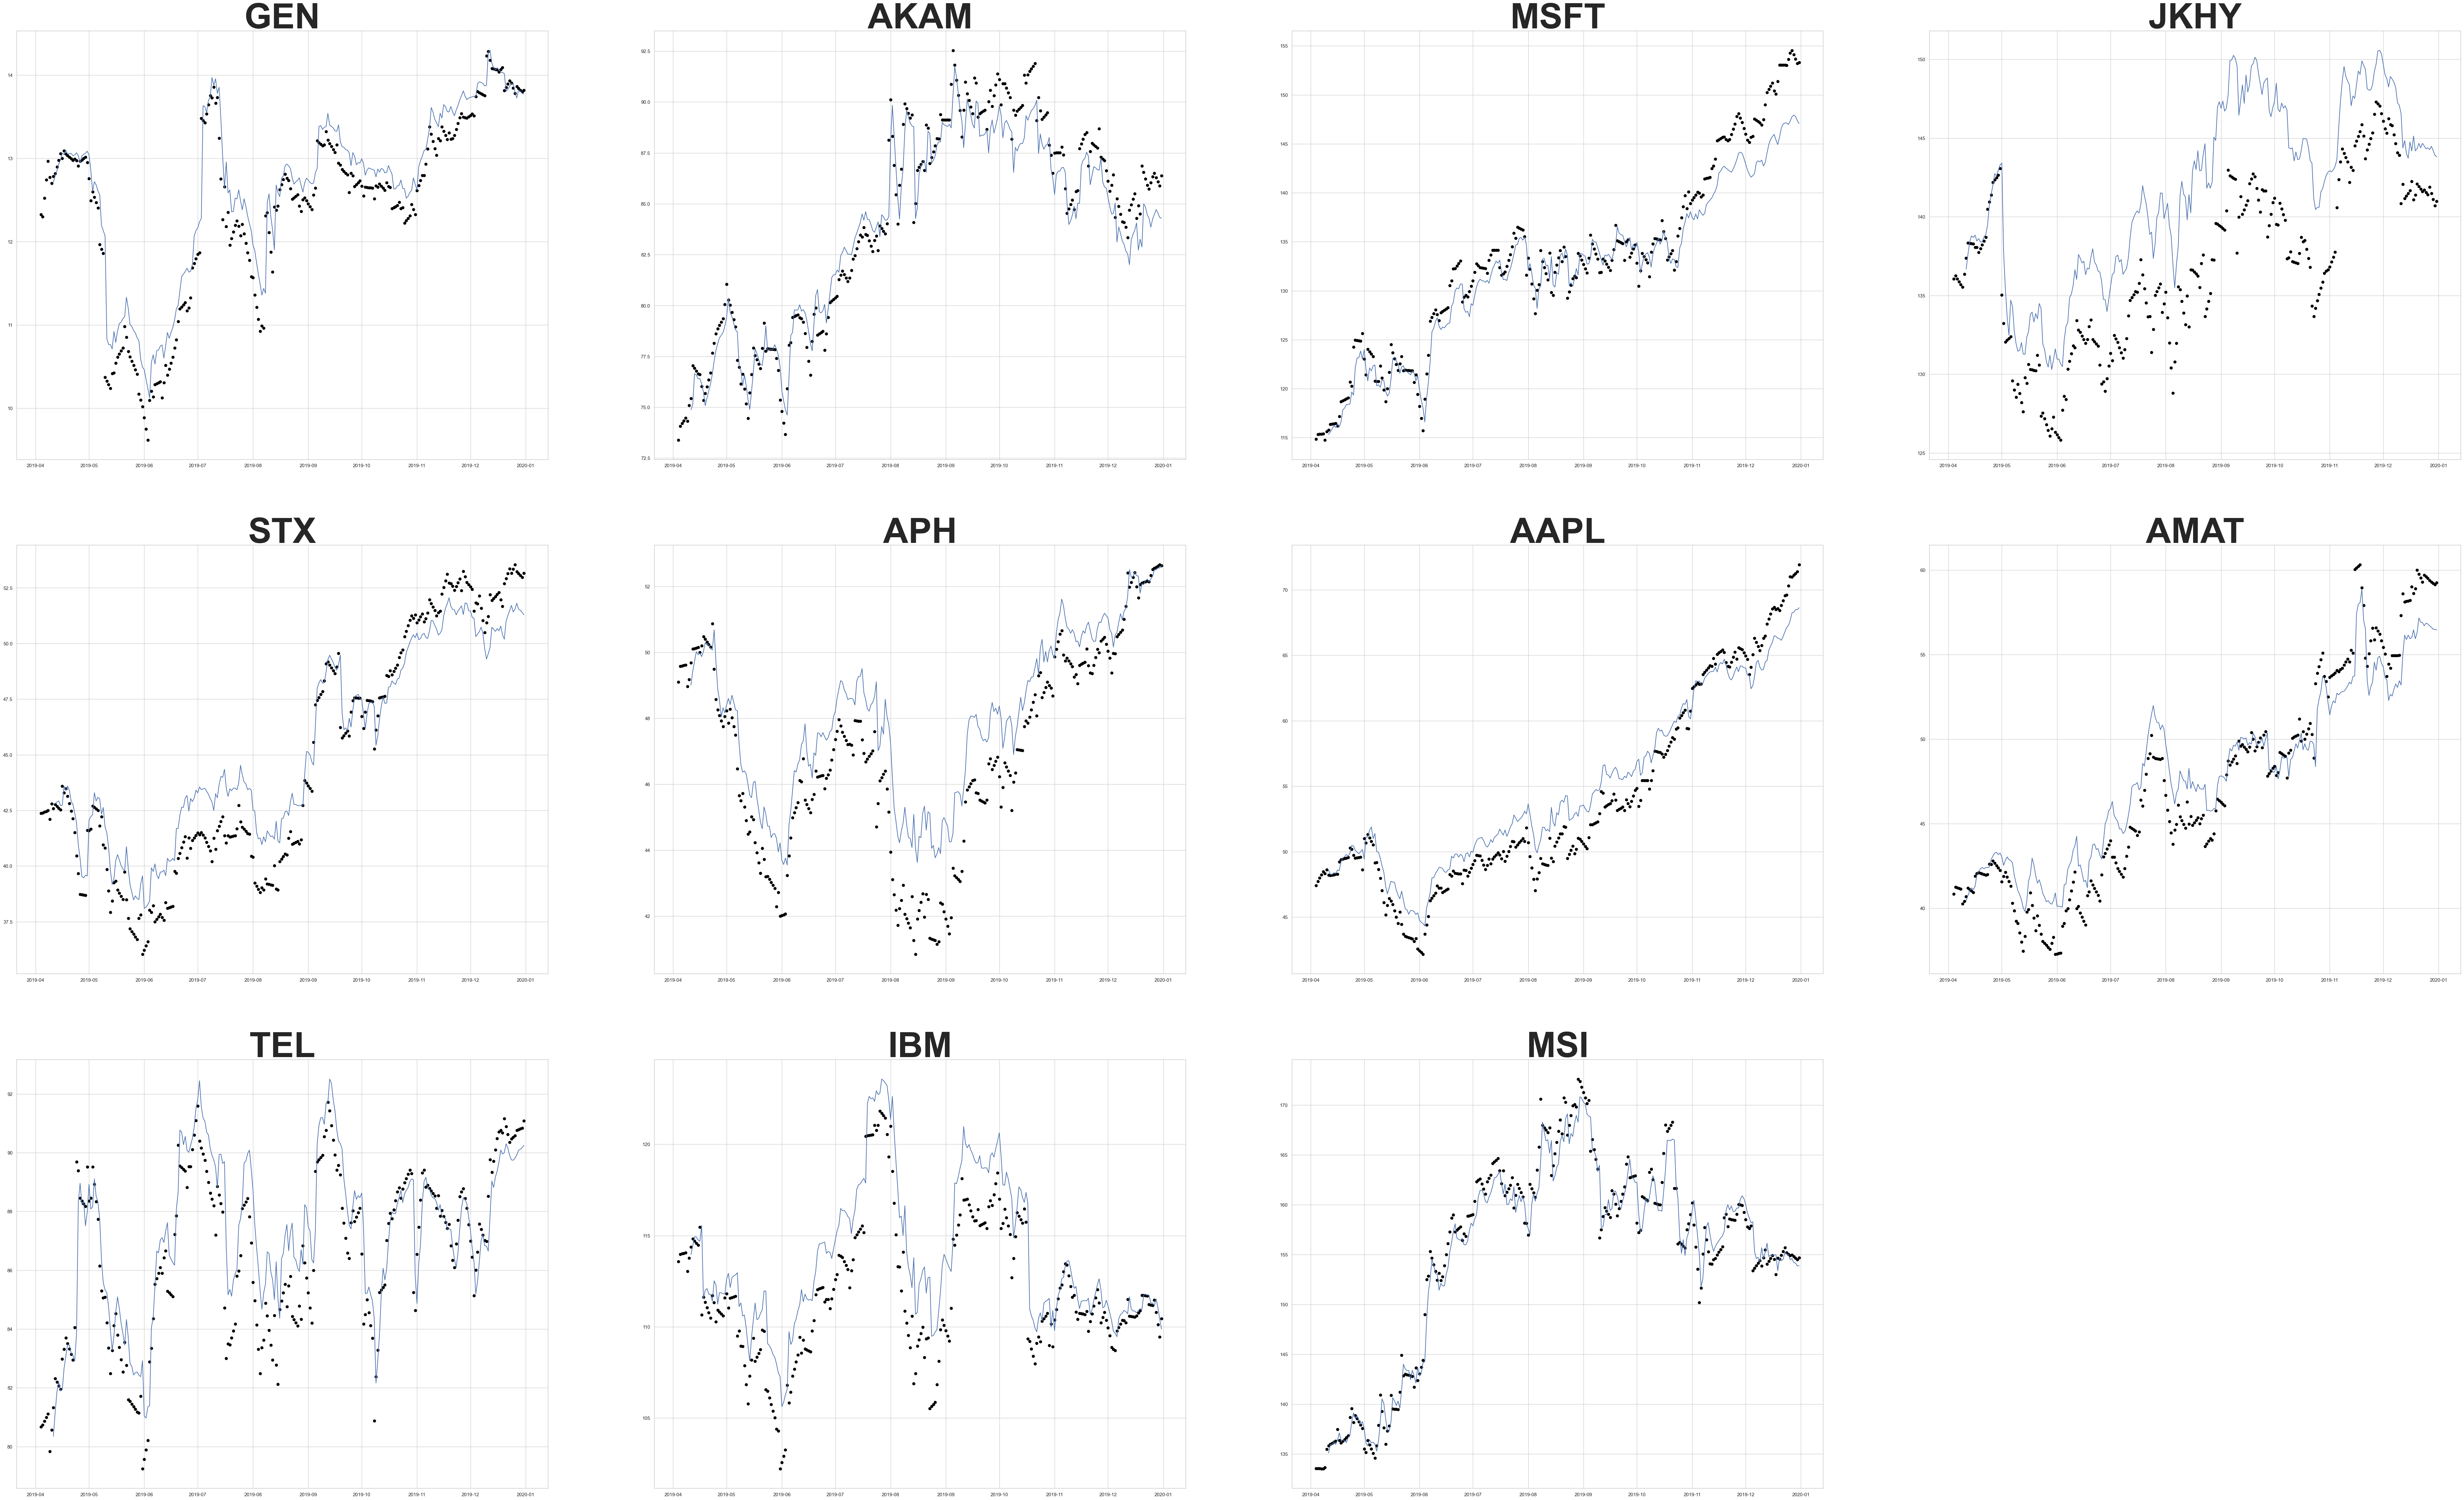

In [62]:
fig, ax = plt.subplots(3,4 , figsize = (100,60))


# industry_symbol['Symbol'/]
for i in range(3):
    for j in range(4):
        ind = 4*i + j 
        if ind == len(industry_symbol):
            break
        symbol = industry_symbol[ind]
        filename = '../model/model_baseline/'+symbol+'_model.pickle'
        model = pickle.load(open(filename, 'rb'))
        test_inp = pd.DataFrame(test[symbol_to_index_map[symbol]])
        test_inp=test_inp.reset_index()
        test_inp=test_inp.rename(columns = {'index' : 'ds', symbol_to_index_map[symbol]:'y'})
        future = model.make_future_dataframe(df=test_inp, periods=365, n_historic_predictions=len(test_inp))
        forecast = model.predict(df=test_inp)
        ax[i,j].scatter(forecast['ds'],forecast['y'], c = 'black')
        ax[i,j].plot(forecast['ds'],forecast['yhat1'])
        ax[i,j].set_title(symbol,fontweight='bold', size=80)
ax[2,3].axis('off')
plt.show()

In [52]:
# Peformance

forecast

,ds,y,residual1,yhat1,ar1,trend,season_yearly,season_weekly
0,2019-04-04,133.549606,NaN,None,None,None,None,None
1,2019-04-05,133.530624,NaN,None,None,None,None,None
2,2019-04-06,133.521133,NaN,None,None,None,None,None
3,2019-04-07,133.511642,NaN,None,None,None,None,None
4,2019-04-08,133.502151,NaN,None,None,None,None,None
...,...,...,...,...,...,...,...,...
267,2019-12-27,154.955536,-0.360687,154.594849,83.548721,73.495827,-2.661523,0.211817
268,2019-12-28,154.798787,-0.614522,154.184265,83.450745,73.516357,-2.741454,-0.041376
269,2019-12-29,154.642039,-0.507411,154.134628,83.462181,73.53688,-2.816272,-0.048161
270,2019-12-30,154.485291,-0.640762,153.844528,83.259697,73.557411,-2.885639,-0.086949


In [53]:
metrics

,SmoothL1Loss,MAE,RMSE,Loss,RegLoss,SmoothL1Loss_val,MAE_val,RMSE_val
0,0.516398,61.012391,79.791803,0.386701,0.0,0.594487,69.029716,88.576935
1,0.460916,56.322475,74.834737,0.344983,0.0,0.537690,64.447533,83.402641
2,0.397563,50.844748,68.346052,0.297446,0.0,0.464487,58.337391,76.438896
3,0.324035,44.154274,60.592414,0.242495,0.0,0.380602,50.942917,67.879509
4,0.243224,36.404286,50.769032,0.181814,0.0,0.292482,42.812378,57.612640
...,...,...,...,...,...,...,...,...
175,0.000091,0.592734,0.869046,0.000078,0.0,0.004401,5.358928,6.456442
176,0.000090,0.587255,0.866722,0.000078,0.0,0.004398,5.355168,6.454310
177,0.000090,0.586023,0.857444,0.000077,0.0,0.004395,5.352011,6.452100
178,0.000090,0.584551,0.865872,0.000077,0.0,0.004397,5.353651,6.453930


In [54]:
for symbol in industry_symbol: # Loop over symbols
    filename = '../model/model_baseline/'+symbol+'_model.pickle' # might wanna change this
    model = pickle.load(open(filename, 'rb'))
    test_inp = pd.DataFrame(test[symbol_to_index_map[symbol]])
    test_inp=test_inp.reset_index()
    test_inp=test_inp.rename(columns = {'index' : 'ds', symbol_to_index_map[symbol]:'y'})
    # future = model.make_future_dataframe(df=test_inp, periods=365, n_historic_predictions=len(test_inp))
    forecast = model.predict(df=test_inp)
    rmse = np.average(forecast['residual1'][7:]**2)**(1/2)
    mae = np.average(np.abs(forecast['residual1'][7:]))
    print(symbol, ':', rmse, mae)

GEN : 0.33534402476944913 0.26975031498843005
AKAM : 1.2994902029668838 1.0590589271401458
MSFT : 2.5717219152951194 1.9933175716760028
JKHY : 5.29739178344029 4.807726215866377
STX : 1.5116838188287 1.3103864633812095
APH : 1.548818581495698 1.2980807730236894
AAPL : 1.8486940439325625 1.6265256677783508
AMAT : 1.9796881089904028 1.6949666029252344
TEL : 1.4067113054377811 1.0844005848626668
IBM : 2.4031208291861166 1.9707349093455184
MSI : 1.8018697289646475 1.34901731479093


In [55]:
for symbol in industry_symbol: # Loop over symbols
    filename = '../model/metrics_baseline/'+symbol+'_metric.pickle' # might wanna change this
    metrics = pickle.load(open(filename, 'rb'))
    print(symbol,':', list(metrics['RMSE_val'])[-1],list(metrics['MAE_val'])[-1] )

GEN : 0.9069316387176514 0.735276460647583
AKAM : 15.85360050201416 12.551936149597168
MSFT : 31.621267318725586 27.080659866333008
JKHY : 22.224525451660156 18.660245895385742
STX : 10.059381484985352 9.082843780517578
APH : 2.2439229488372803 1.8057644367218018
AAPL : 9.357071876525879 8.081422805786133
AMAT : 4.375819206237793 3.6399760246276855
TEL : 6.604054927825928 5.38702392578125
IBM : 10.079657554626465 8.173264503479004
MSI : 6.4538140296936035 5.35358190536499


In [56]:
metrics

,SmoothL1Loss,MAE,RMSE,Loss,RegLoss,SmoothL1Loss_val,MAE_val,RMSE_val
0,0.516398,61.012391,79.791803,0.386701,0.0,0.594487,69.029716,88.576935
1,0.460916,56.322475,74.834737,0.344983,0.0,0.537690,64.447533,83.402641
2,0.397563,50.844748,68.346052,0.297446,0.0,0.464487,58.337391,76.438896
3,0.324035,44.154274,60.592414,0.242495,0.0,0.380602,50.942917,67.879509
4,0.243224,36.404286,50.769032,0.181814,0.0,0.292482,42.812378,57.612640
...,...,...,...,...,...,...,...,...
175,0.000091,0.592734,0.869046,0.000078,0.0,0.004401,5.358928,6.456442
176,0.000090,0.587255,0.866722,0.000078,0.0,0.004398,5.355168,6.454310
177,0.000090,0.586023,0.857444,0.000077,0.0,0.004395,5.352011,6.452100
178,0.000090,0.584551,0.865872,0.000077,0.0,0.004397,5.353651,6.453930


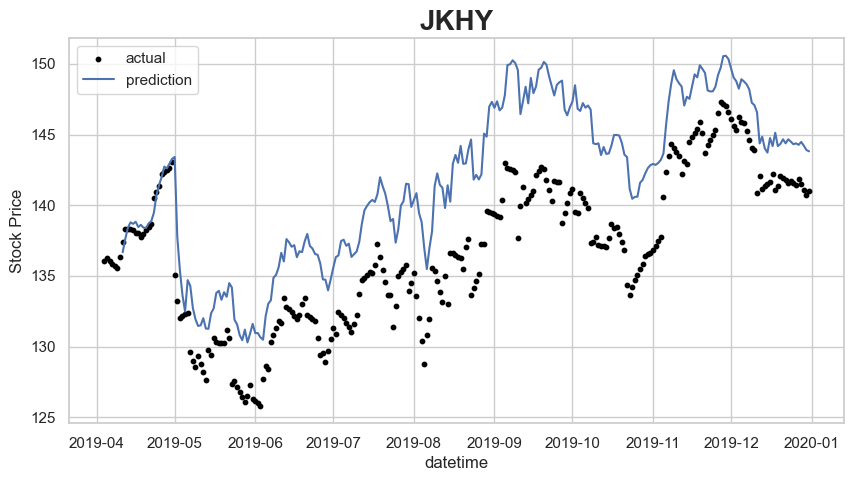

In [70]:
symbol = 'JKHY'
# symbol = industry_symbol[ind]
filename = '../model/model_baseline/'+symbol+'_model.pickle'
model = pickle.load(open(filename, 'rb'))
test_inp = pd.DataFrame(test[symbol_to_index_map[symbol]])
test_inp=test_inp.reset_index()
test_inp=test_inp.rename(columns = {'index' : 'ds', symbol_to_index_map[symbol]:'y'})
future = model.make_future_dataframe(df=test_inp, periods=365, n_historic_predictions=len(test_inp))
forecast = model.predict(df=test_inp)
plt.figure(figsize=(10,5))
plt.scatter(forecast['ds'],forecast['y'], c = 'black', s = 10)
plt.plot(forecast['ds'],forecast['yhat1'])
plt.legend(['actual', 'prediction'])
plt.title(symbol,fontweight='bold', size=20)
plt.xlabel('datetime') 
plt.ylabel('Stock Price') 


plt.show()

In [72]:
rmse = np.average(forecast['residual1'][7:]**2)**(1/2)
mae = np.average(np.abs(forecast['residual1'][7:]))
print(rmse)

5.29739178344029


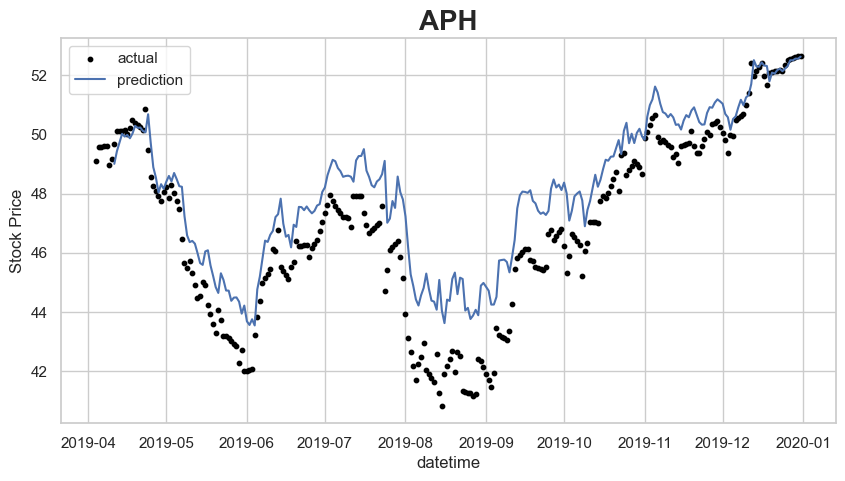

In [59]:
symbol = 'APH'
# symbol = industry_symbol[ind]
filename = '../model/model_baseline/'+symbol+'_model.pickle'
model = pickle.load(open(filename, 'rb'))
test_inp = pd.DataFrame(test[symbol_to_index_map[symbol]])
test_inp=test_inp.reset_index()
test_inp=test_inp.rename(columns = {'index' : 'ds', symbol_to_index_map[symbol]:'y'})
future = model.make_future_dataframe(df=test_inp, periods=365, n_historic_predictions=len(test_inp))
forecast = model.predict(df=test_inp)
plt.figure(figsize=(10,5))
plt.scatter(forecast['ds'],forecast['y'], c = 'black', s = 10)
plt.plot(forecast['ds'],forecast['yhat1'])
plt.legend(['actual', 'prediction'])
plt.title(symbol,fontweight='bold', size=20)
plt.xlabel('datetime') 
plt.ylabel('Stock Price') 


plt.show()

In [60]:
r = []
m = []
i= 0
for symbol in industry_symbol: # Loop over symbols
    i +=1
    filename = '../model/model_baseline/'+symbol+'_model.pickle' # might wanna change this
    model = pickle.load(open(filename, 'rb'))
    test_inp = pd.DataFrame(test[symbol_to_index_map[symbol]])
    test_inp=test_inp.reset_index()
    test_inp=test_inp.rename(columns = {'index' : 'ds', symbol_to_index_map[symbol]:'y'})
    future = model.make_future_dataframe(df=test_inp, periods=365, n_historic_predictions=len(test_inp))
    forecast = model.predict(df=test_inp)
    rmse = np.average(forecast['residual1'][7:]**2)**(1/2)
    mae = np.average(np.abs(forecast['residual1'][7:]))
    print(symbol, ':', rmse, mae)
    r.append(rmse)
    m.append(mae)


print('avg_rmse:' , sum(r)/i)
print('avg_mae:',  sum(m)/i)

GEN : 0.33534402476944913 0.26975031498843005
AKAM : 1.2994902029668838 1.0590589271401458
MSFT : 2.5717219152951194 1.9933175716760028
JKHY : 5.29739178344029 4.807726215866377
STX : 1.5116838188287 1.3103864633812095
APH : 1.548818581495698 1.2980807730236894
AAPL : 1.8486940439325625 1.6265256677783508
AMAT : 1.9796881089904028 1.6949666029252344
TEL : 1.4067113054377811 1.0844005848626668
IBM : 2.4031208291861166 1.9707349093455184
MSI : 1.8018697289646475 1.34901731479093
avg_rmse: 2.0004122130279685
avg_mae: 1.6785423041616871
